In [ ]:
import pandas as pd

In [4]:
df=pd.read_csv('AgeGroupDetails.csv')

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

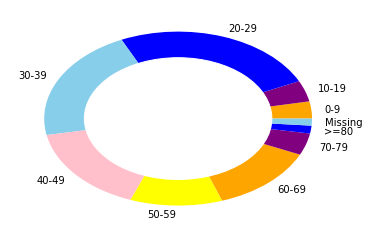

In [6]:
Agegrp='0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','>=80','Missing'
TotalCases=[3.18,3.90,24.86,21.10,16.18,11.13,12.86,4.05,1.45,1.30]
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(TotalCases, labels=Agegrp, colors=['orange','purple','blue','skyblue','pink','yellow'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

From Above Pie-chart we can say that '20-29' age group has maximum Covid-19 Positive cases.

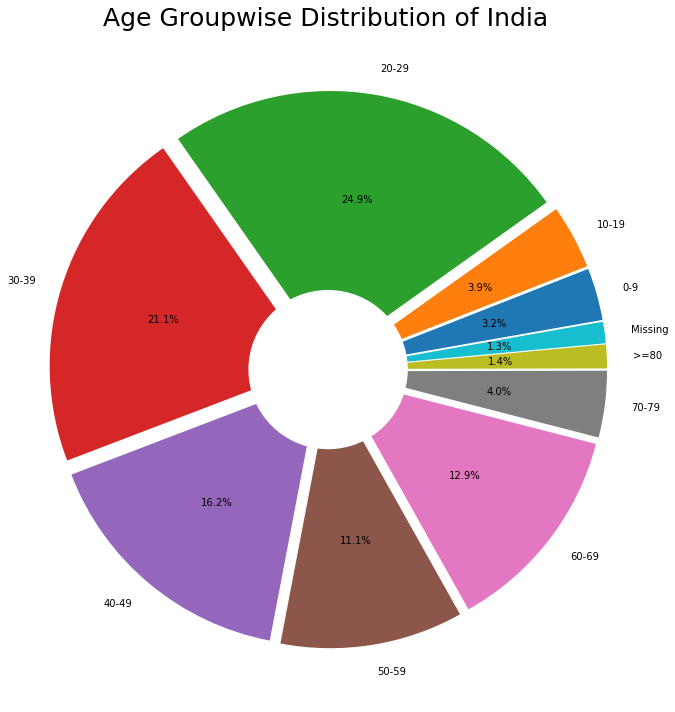

In [7]:
labels = list(df['AgeGroup'])
sizes = list(df['TotalCases'])

explode = []

for i in labels:
  explode.append(0.05)
plt.figure(figsize = (9,10) )
plt.pie(sizes,labels=labels, autopct='%1.1f%%',startangle=10,explode=explode)
centre_circle = plt.Circle((0,0),0.30,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age Groupwise Distribution of India',fontsize=25)
plt.axis('equal')
plt.tight_layout()

In [8]:
df1 = pd.read_csv('covid_19_india.csv')

In [9]:
df.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [10]:
list(df)

['Sno', 'AgeGroup', 'TotalCases', 'Percentage']

In [11]:
## Removed unwanted col 'Sno'
df1 = df1.drop(['Sno'], axis= 1)

(array([756.,  58.,  24.,  12.,   4.,   5.,   1.,   1.,   1.,   1.]),
 array([1.0000e+00, 1.5830e+02, 3.1560e+02, 4.7290e+02, 6.3020e+02,
        7.8750e+02, 9.4480e+02, 1.1021e+03, 1.2594e+03, 1.4167e+03,
        1.5740e+03]),
 <a list of 10 Patch objects>)

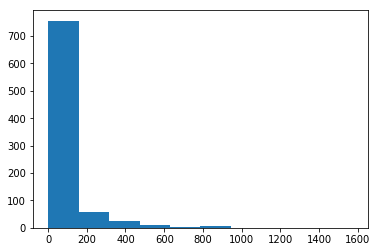

In [12]:
plt.hist(df1['Confirmed'])

You can't make a histogram by this raw data. So we will do some malipulations


In [13]:
df1['Confirmed'].value_counts()

1       135
3        81
2        48
7        36
4        27
       ... 
96        1
97        1
197       1
190       1
1018      1
Name: Confirmed, Length: 196, dtype: int64

In [14]:
## You can see that all the state having multiple entries.  We must group them to know cummulative sum.
df1['State/UnionTerritory'].value_counts()

Kerala                         73
Telengana                      41
Delhi                          41
Rajasthan                      40
Haryana                        39
Uttar Pradesh                  39
Ladakh                         36
Tamil Nadu                     36
Karnataka                      34
Jammu and Kashmir              34
Punjab                         34
Maharashtra                    34
Andhra Pradesh                 31
Uttarakhand                    28
Odisha                         27
Puducherry                     25
West Bengal                    25
Chhattisgarh                   24
Chandigarh                     24
Gujarat                        23
Himachal Pradesh               22
Madhya Pradesh                 22
Bihar                          21
Manipur                        19
Mizoram                        18
Goa                            17
Andaman and Nicobar Islands    17
Jharkhand                      11
Assam                          11
Arunachal Prad

In [15]:
## Groupby state wise by adding sum of Confirmed..
statewise_confirmed = df1.groupby('State/UnionTerritory')['Confirmed'].sum()
statewise_confirmed

State/UnionTerritory
Andaman and Nicobar Islands      149
Andhra Pradesh                  2704
Arunachal Pradesh                  9
Assam                            237
Bihar                            470
Chandigarh                       273
Chhattisgarh                     160
Delhi                           6279
Goa                               96
Gujarat                         2154
Haryana                         1565
Himachal Pradesh                 172
Jammu and Kashmir               1498
Jharkhand                         64
Karnataka                       2347
Kerala                          5214
Ladakh                           355
Madhya Pradesh                  2351
Maharashtra                    10406
Manipur                           28
Mizoram                           18
Odisha                           309
Puducherry                        67
Punjab                          1221
Rajasthan                       3676
Tamil Nadu                      6392
Telengana        

In [16]:
import seaborn as sns

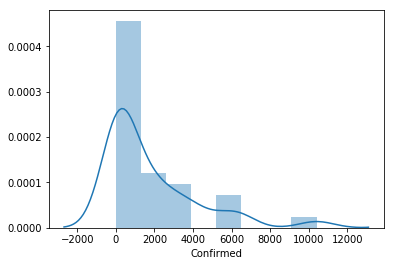

In [17]:
sns.distplot(statewise_confirmed)

In [18]:
list(df1)

['Date',
 'Time',
 'State/UnionTerritory',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [19]:
df1.groupby('State/UnionTerritory')['ConfirmedIndianNational'].agg(['sum', 'count'])

,sum,count
State/UnionTerritory,,
Andaman and Nicobar Islands,116--------------,17
Andhra Pradesh,11111112335789111214--------------,31
Arunachal Pradesh,---------,9
Assam,-----------,11
Bihar,2234669--------------,21
Chandigarh,1115677778--------------,24
Chhattisgarh,1111111666--------------,24
Delhi,1112333445667778911162528282930353538---------...,41
Goa,333--------------,17


In [20]:
### Replace missing values by Nan
df2 = pd.read_csv('covid_19_india.csv', na_values=["-"])

In [21]:
df2 = df2.drop(['Sno'], axis= 1)

In [22]:
statewise_ConfirmedIndianNational = df2.groupby('State/UnionTerritory')['ConfirmedIndianNational'].sum().astype(int)
statewise_ConfirmedIndianNational

State/UnionTerritory
Andaman and Nicobar Islands       8
Andhra Pradesh                   81
Arunachal Pradesh                 0
Assam                             0
Bihar                            32
Chandigarh                       50
Chhattisgarh                     25
Delhi                           352
Goa                               9
Gujarat                         256
Haryana                         111
Himachal Pradesh                 21
Jammu and Kashmir                95
Jharkhand                         0
Karnataka                       405
Kerala                         1091
Ladakh                          162
Madhya Pradesh                  105
Maharashtra                    1111
Manipur                           5
Mizoram                           4
Odisha                           23
Puducherry                       11
Punjab                          231
Rajasthan                       296
Tamil Nadu                      138
Telengana                       246
Tripura

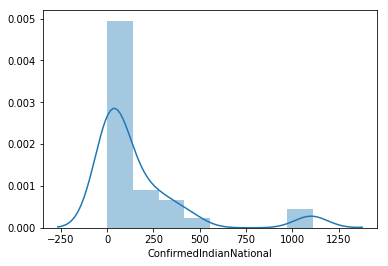

In [23]:
sns.distplot(statewise_ConfirmedIndianNational)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [25]:

df2.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered', 'Confirmed': 'Confirmed'}, inplace=True)

statewise_cases = pd.DataFrame(df2.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" # in order to have a single root node
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',
                  color='Confirmed', hover_data=['State'],
                  color_continuous_scale='Rainbow')
fig.show()

NameError: name 'px' is not defined